<a href="https://colab.research.google.com/github/SAVCHink2042/Statistical-teor_prob-prac/blob/main/6_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D1%83%D0%BC_%D0%BF%D0%BE_%D1%81%D0%BB%D1%83%D1%87_%D0%BF%D1%80%D0%BE%D1%86_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1. Продемонстрировать закон арксинуса для

(a) Первый вариант: момента пересечения нуля траекторией до момента n: построить на одном графике гистограмму последнего попадания в 0 и плотность из закона арксинуса при достаточно большом n,

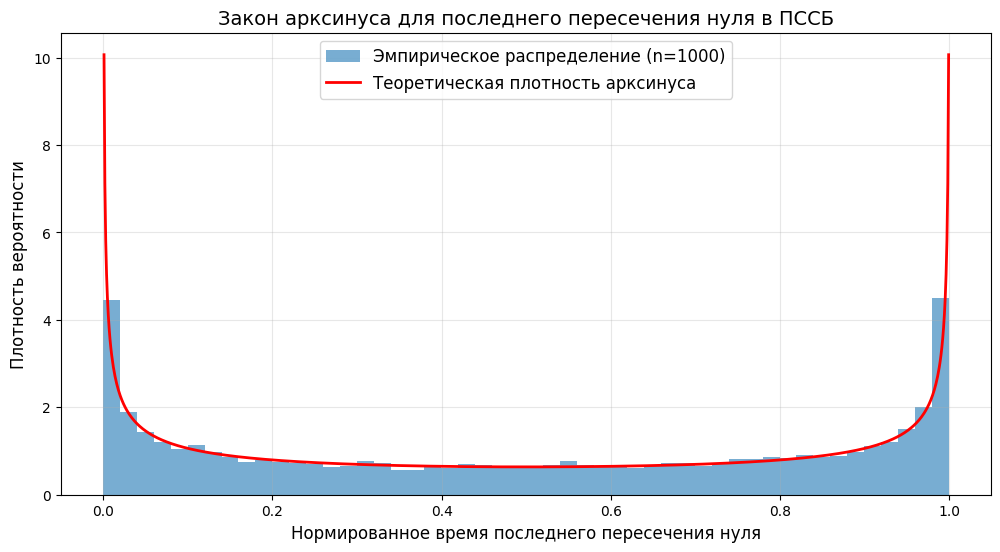

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine

def simulate_last_zero_crossing(n, num_trials=10000):
    """Моделирует последнее пересечение нуля до момента n"""
    last_zero_times = []

    for _ in range(num_trials):
        steps = np.random.choice([-1, 1], size=n)
        walk = np.cumsum(steps)

        zero_crossings = np.where(walk == 0)[0]


        last_zero = zero_crossings[-1] if len(zero_crossings) > 0 else 0
        last_zero_times.append(last_zero / n)

    return last_zero_times

n = 1000  # Длина траектории
num_trials = 10000  # Количество испытаний

last_zeros = simulate_last_zero_crossing(n, num_trials)

x = np.linspace(0, 1, 1000)
arcsine_pdf = arcsine.pdf(x)

plt.figure(figsize=(12, 6))

plt.hist(last_zeros, bins=50, density=True, alpha=0.6,
         label=f'Эмпирическое распределение (n={n})')

plt.plot(x, arcsine_pdf, 'r-', lw=2,
         label='Теоретическая плотность арксинуса')

plt.xlabel('Нормированное время последнего пересечения нуля', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Закон арксинуса для последнего пересечения нуля в ПССБ', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Задание 2. Убедиться, что СБ0 нулево возвратно. Для этого запустить траекторию, дождаться n таких возвращений и посчитать их среднюю длину. Как она ведет себя с ростом n?

Первый вариант: ПССБ,

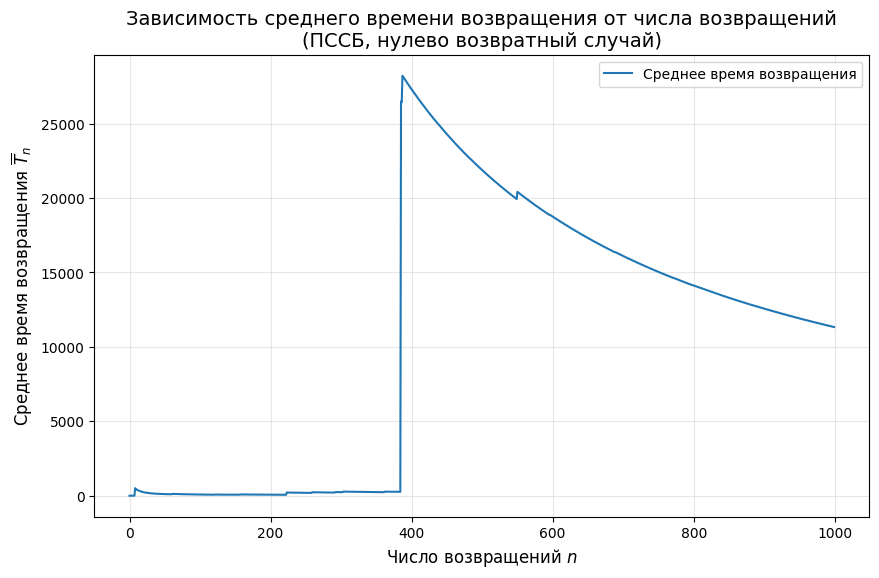

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_simulation(n):
    returns = []
    step = 0
    position = 0
    for i in range(n):
        j = 0
        while(  True ):
            j+=1
            step = np.random.choice([-1, 1])
            position += step
            if position == 0:
                returns.append(j)
                break
    return returns

def calculating_the_average_return_time(returns):
    time = []
    number = 0
    for i in range( len(returns) ):
        number+= returns[i]
        time.append( number / (i+1 ) )
    return time

n = 1000

returns = random_walk_simulation(n)
avg_time = calculating_the_average_return_time(returns)


plt.figure(figsize=(10, 6))
plt.plot(avg_time, label="Среднее время возвращения")
plt.xlabel("Число возвращений $n$", fontsize=12)
plt.ylabel("Среднее время возвращения $\\overline{T}_n$", fontsize=12)
plt.title("Зависимость среднего времени возвращения от числа возвращений\n(ПССБ, нулево возвратный случай)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


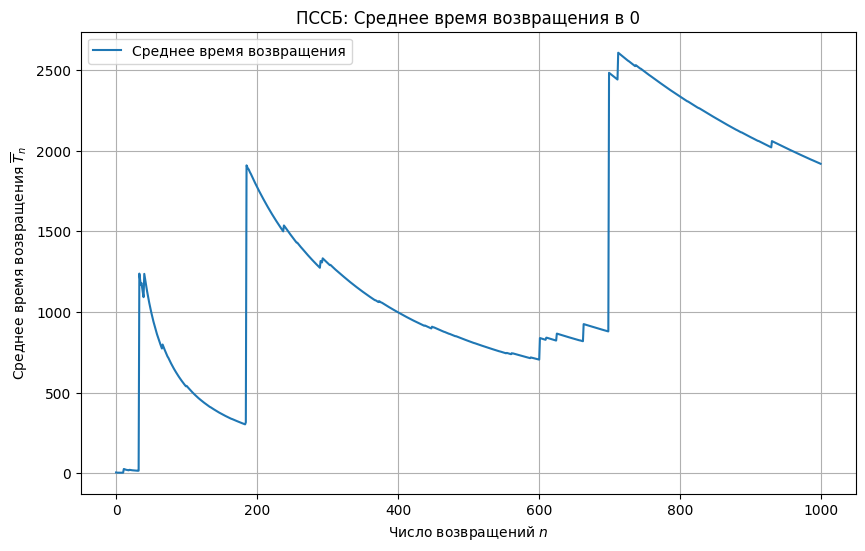

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_return_times(n_returns):
    return_times = []
    for _ in range(n_returns):
        position = 0
        steps = 0
        while True:
            steps += 1
            position += np.random.choice([-1, 1])
            if position == 0:
                return_times.append(steps)
                break
    return return_times

n_returns = 1000
return_times = simulate_return_times(n_returns)
avg_times = np.cumsum(return_times) / (np.arange(n_returns) + 1)

plt.figure(figsize=(10, 6))
plt.plot(avg_times, label="Среднее время возвращения")
plt.xlabel("Число возвращений $n$")
plt.ylabel("Среднее время возвращения $\\overline{T}_n$")
plt.title("ПССБ: Среднее время возвращения в 0")
plt.grid(True)
plt.legend()
plt.show()

Задание 3. Проиллюстрировать закон повторного логарифма: построить на одном графике много траекторий случайного блуждания и графики функций y = ±√(2n ln ln n). Рассмотреть ПССБ и СБ0 с распределением шага N (0, 1).

Пункт А. ПССБ

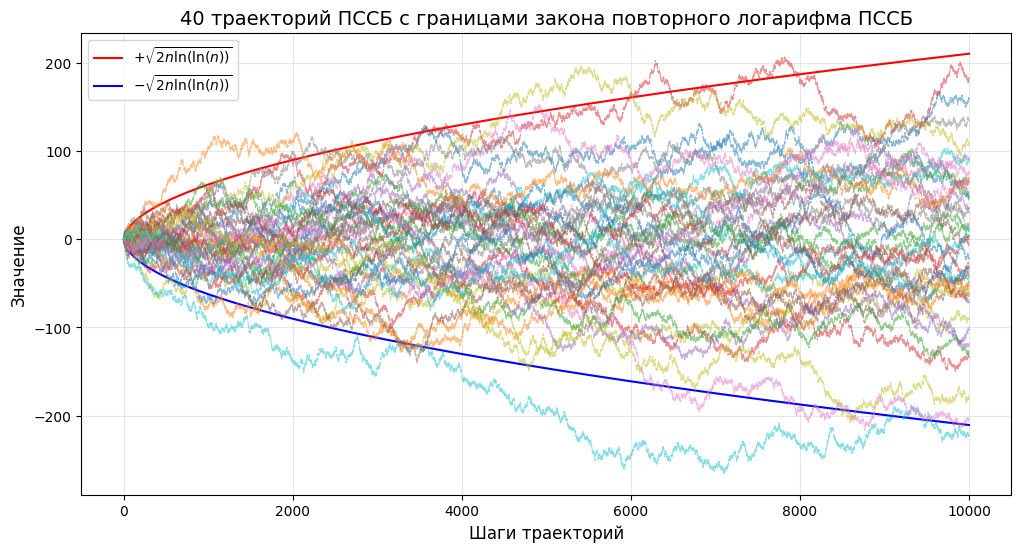

In [ ]:

k = 40     # количество траекторий
n = 10000    # длина траекторий
y_up=[]
y_low=[]
x_values = range(3, n)  # значения n для границ
matrix = [ [0] for i in range(k) ]
for i in range(3, n):
    y_up.append(np.sqrt(2*i*mt.log(mt.log(i))))
    y_low.append( - np.sqrt( 2*i*mt.log( mt.log(i) ) ) )
for j in range(k):
    for i in range(1,n):
        step = np.random.choice([-1, 1])
        matrix[j].append( matrix[j][-1] + step )

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_up, 'r-', label='$+\sqrt{2n\ln(\ln(n))}$')
plt.plot(x_values, y_low, 'b-', label='$-\sqrt{2n\ln(\ln(n))}$')



for j in range(k):
    plt.plot( range(n), matrix[j], '--', alpha=0.5, linewidth=0.8)


plt.xlabel('Шаги траекторий', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title(f'{k} траекторий  с границами закона повторного логарифма ПССБ', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

ПУНКТ Б СБ0 ~N(0,1)

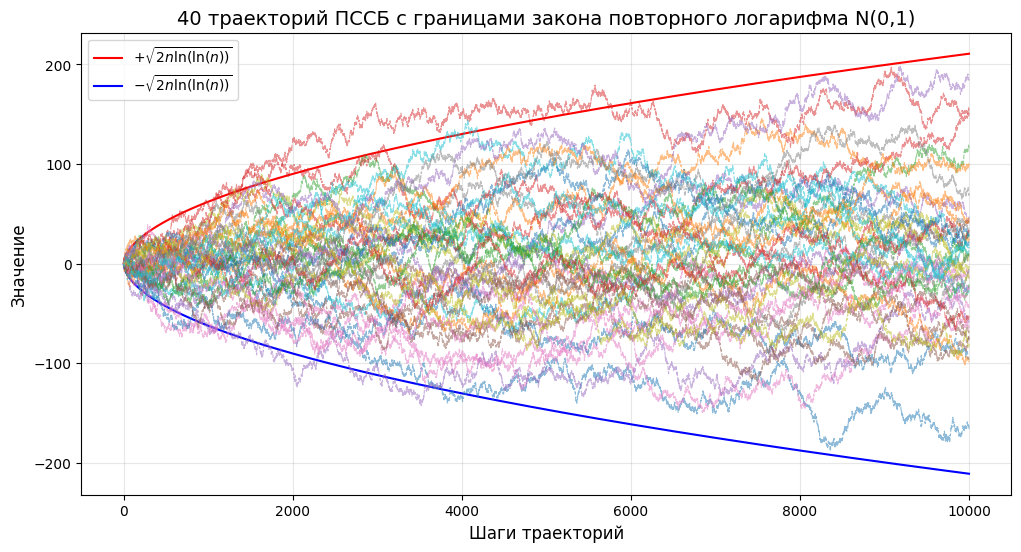

In [ ]:
matrix = [ [0] for i in range(k) ]
for j in range(k):
    for i in range(1,n):
        step = np.random.normal(0, 1)
        matrix[j].append( matrix[j][-1] + step )

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_up, 'r-', label='$+\sqrt{2n\ln(\ln(n))}$')
plt.plot(x_values, y_low, 'b-', label='$-\sqrt{2n\ln(\ln(n))}$')



for j in range(k):
    plt.plot( range(n), matrix[j], '--', alpha=0.5, linewidth=0.8)


plt.xlabel('Шаги траекторий', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title(f'{k} траекторий с границами закона повторного логарифма N(0,1)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

Задание 4.(первый вариант p =1/2 ) Задача о разорении игрока. Пусть у игрока в начале есть A руб., каждую партию он выигрывает
с вероятностью p и получает за нее 1 руб. Игра прекращается, когда у игрока накапливается B руб.
или не остается денег. По n испытаниям найти эмпирические вероятности разорения для A = 10 и а)

B = 3A/2, б) B = 2A, в) B = 10A и сравнить их с теоретическими, также оценить среднее время
разорения (если вы их не считали, то можете взять ответы здесь.

    B |     Эмп. P |    Теор. P |   Эмп. время |  Теор. время
-----------------------------------------------------------------
   15 |     0.3230 |     0.3333 |         48.3 |         50.0
   20 |     0.5250 |     0.5000 |        102.5 |        100.0
  100 |     0.8880 |     0.9000 |        957.6 |        900.0


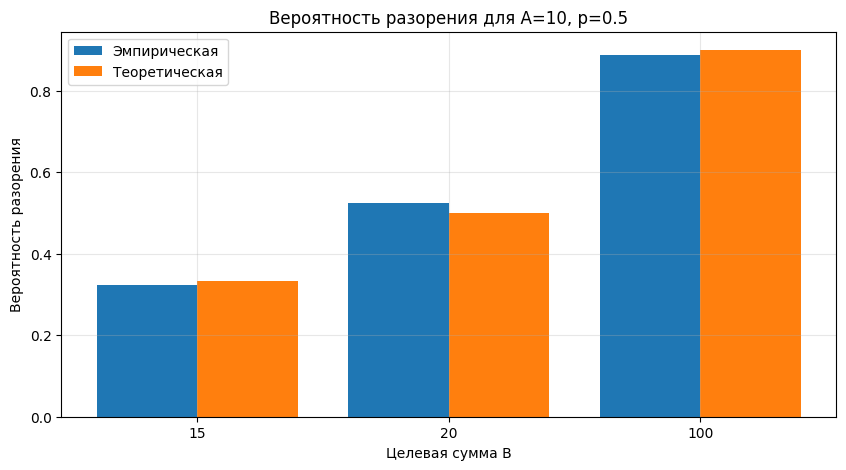

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ruin(A, B, p, n_trials=1000):

    ruin_count = 0
    total_steps = 0

    for _ in range(n_trials):
        money = A
        steps = 0
        while money > 0 and money < B:
            if np.random.random() < p:
                money += 1
            else:
                money -= 1
            steps += 1

        if money == 0:
            ruin_count += 1
        total_steps += steps

    return ruin_count / n_trials, total_steps / n_trials

def theoretical_ruin_prob(A, B):       # Теоретическая вероятность разорения для p=1/2
    return (B - A) / B

def theoretical_avg_steps(A, B):       # Теоретическое среднее время игры для p=1/2
    return A * (B - A)

A = 10
B_values = [ int(1.5*A), 2*A, 10*A]
p = 0.5
n_trials = 1000


results = []
for B in B_values:
    emp_prob, emp_steps = simulate_ruin( A, B, p, n_trials )
    theo_prob = theoretical_ruin_prob(A, B)
    theo_steps = theoretical_avg_steps(A, B)

    results.append({
        'A': A,
        'B': B,
        'Эмпирическая P(разорения)': emp_prob,
        'Теоретическая P(разорения)': theo_prob,
        'Эмпирическое ср. время': emp_steps,
        'Теоретическое ср. время': theo_steps
    })

print(f"{'B':>5} | {'Эмп. P':>10} | {'Теор. P':>10} | {'Эмп. время':>12} | {'Теор. время':>12}")
print("-"*65)
for res in results:
    print(f"{res['B']:5} | {res['Эмпирическая P(разорения)']:10.4f} | {res['Теоретическая P(разорения)']:10.4f} | "
          f"{res['Эмпирическое ср. время']:12.1f} | {res['Теоретическое ср. время']:12.1f}")

plt.figure(figsize=(10, 5))
x = range(len(B_values))
emp_probs = [res['Эмпирическая P(разорения)'] for res in results]
theo_probs = [res['Теоретическая P(разорения)'] for res in results]

plt.bar([i-0.2 for i in x], emp_probs, width=0.4, label='Эмпирическая')
plt.bar([i+0.2 for i in x], theo_probs, width=0.4, label='Теоретическая')
plt.xticks(x, B_values)
plt.xlabel('Целевая сумма B')
plt.ylabel('Вероятность разорения')
plt.title(f'Вероятность разорения для A={A}, p={p}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

